In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
col = data.feature_names

x = data.data
y = data.target

In [3]:
x = pd.DataFrame(x, columns=col)

In [4]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x.shape

(150, 4)

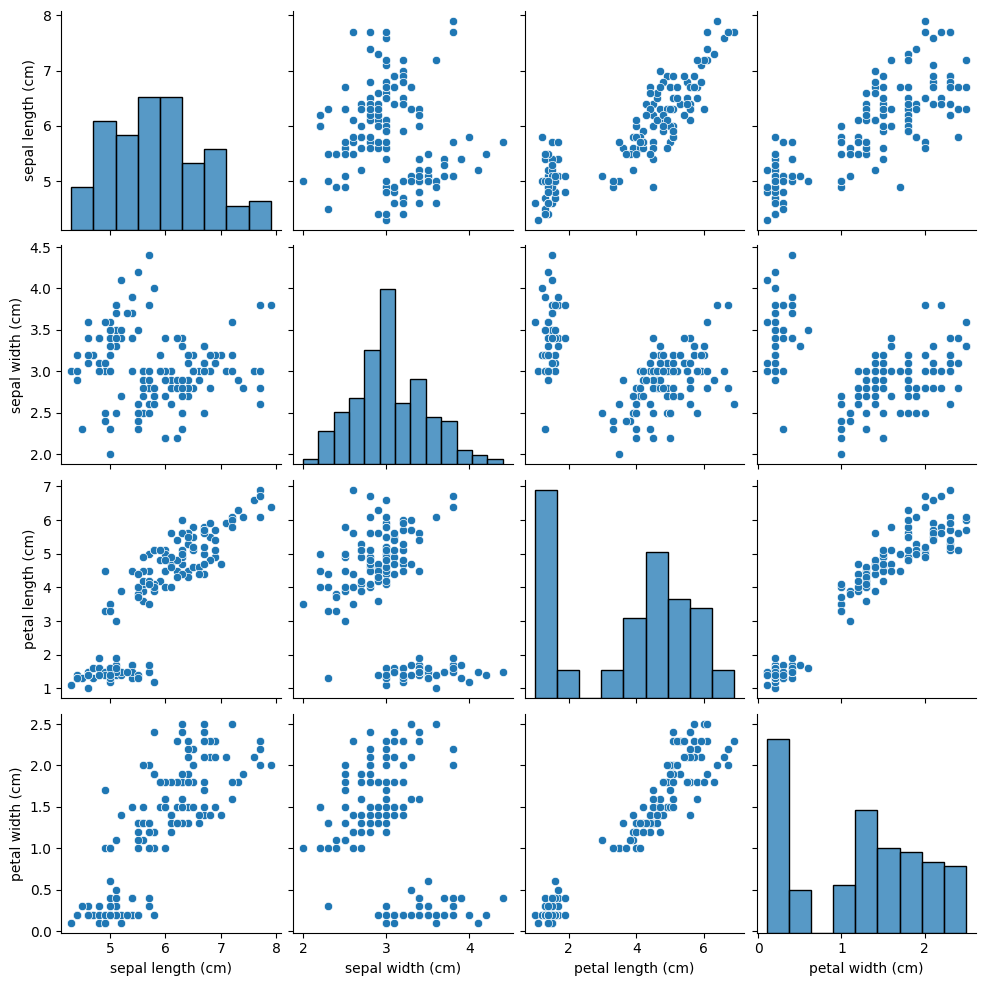

In [6]:
sns.pairplot(data=x)
plt.show()

In [7]:
from sklearn.cluster import KMeans

In [8]:
wscc = []
for i in range(2, 21):
    kt = KMeans(n_clusters=i)
    kt.fit(x)
    wscc.append(kt.inertia_)

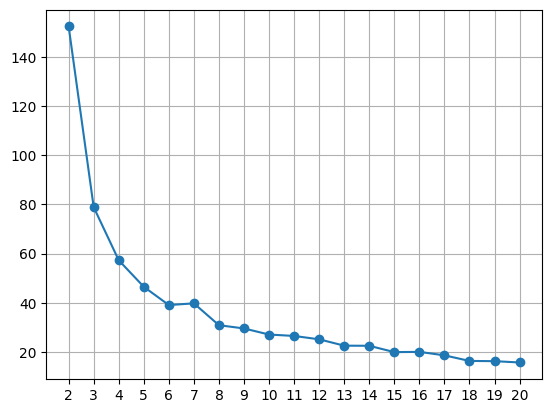

In [9]:
plt.plot([i for i in range(2, 21)], wscc, marker='o')
plt.xticks([ i for i in range(2,21)])
plt.grid(visible='x')
plt.show()

## K Mean Clustering

In [27]:
kt = KMeans(n_clusters=3)
x['predict'] = kt.fit_predict(x)

In [28]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2


In [32]:
from sklearn.metrics import silhouette_score
round(silhouette_score(x, kt.labels_), 2)

0.43

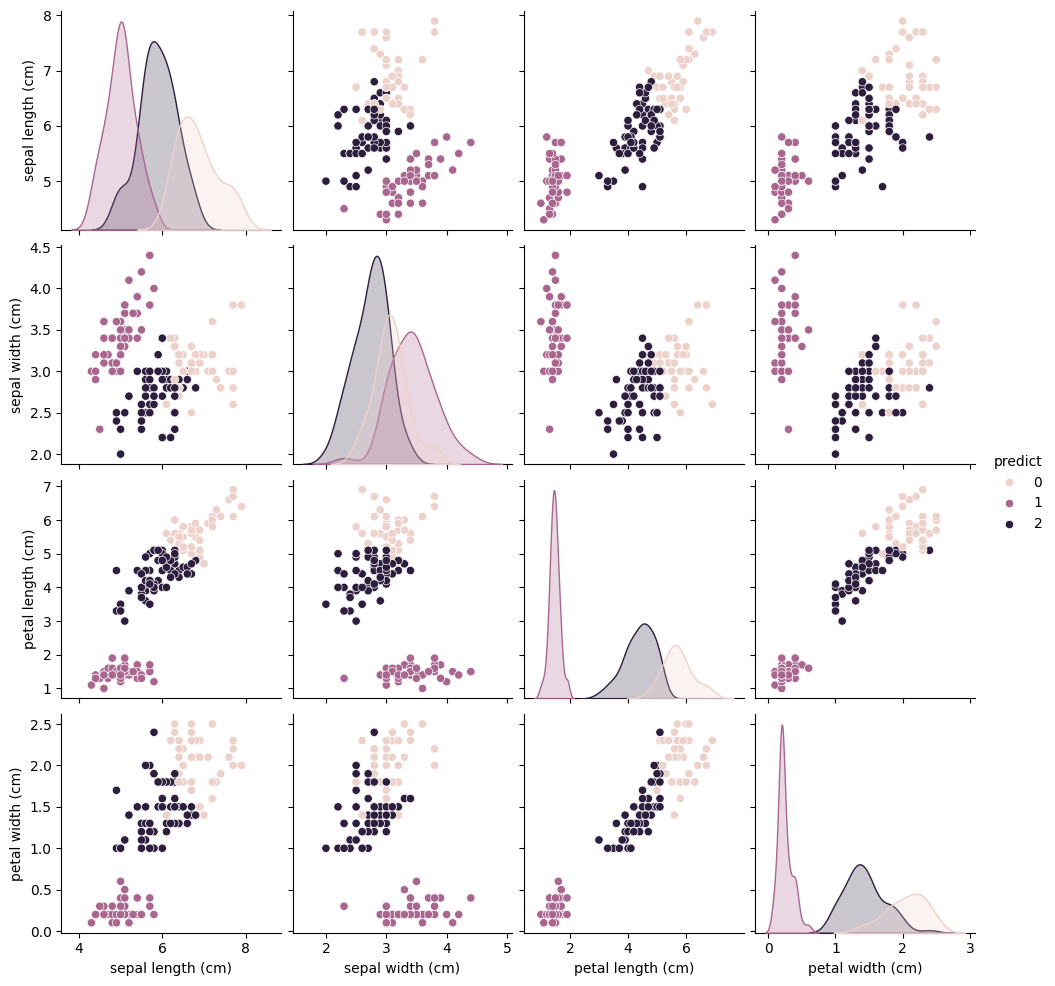

In [13]:
sns.pairplot(data=x, hue='predict')
plt.show()

## Hierarchical Clustering

In [14]:
x.drop('predict', axis=1, inplace=True)

In [15]:
x.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [16]:
import scipy.cluster.hierarchy as sc

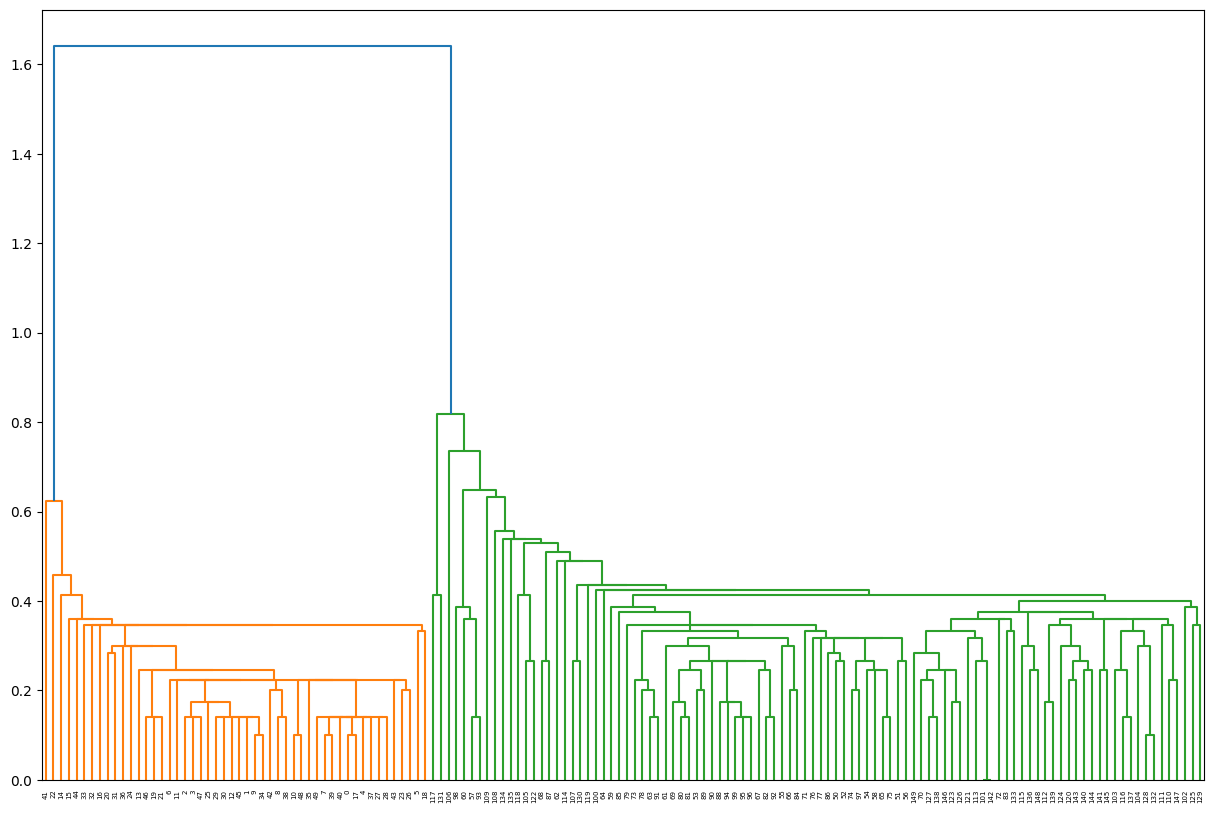

In [17]:
plt.figure(figsize=(15, 10))
sc.dendrogram(sc.linkage(x, method='single', metric='euclidean'))
plt.show()

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
ag = AgglomerativeClustering(n_clusters=2)
x['predict'] = ag.fit_predict(x)

In [34]:
round(silhouette_score(x, ag.labels_), 2)

0.7

In [20]:
x.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
41,4.5,2.3,1.3,0.3,1
126,6.2,2.8,4.8,1.8,0
16,5.4,3.9,1.3,0.4,1
11,4.8,3.4,1.6,0.2,1
114,5.8,2.8,5.1,2.4,0


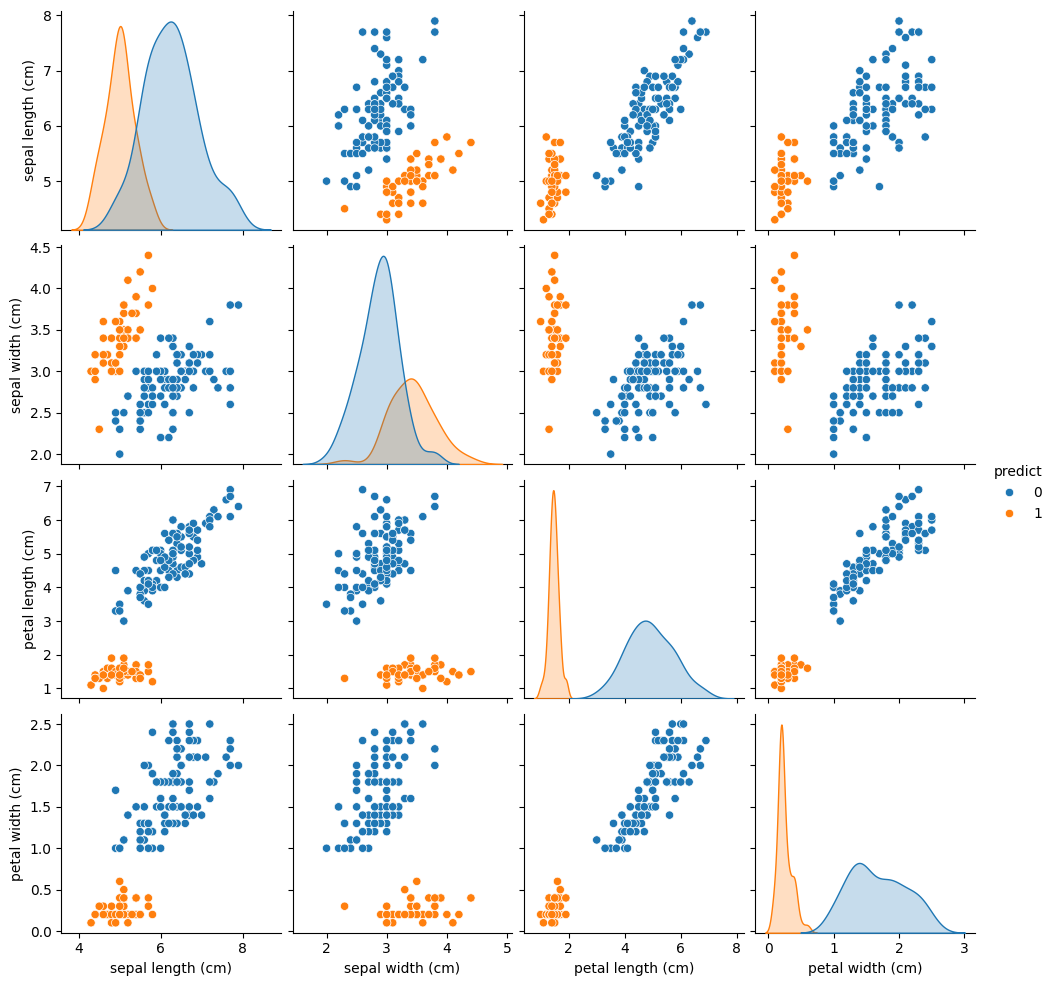

In [21]:
sns.pairplot(data=x, hue='predict')
plt.show()

## DBSCAN Clustering

In [22]:
x.drop('predict', axis=1, inplace=True)

In [23]:
from sklearn.cluster import DBSCAN

In [24]:
db = DBSCAN(eps=0.2, min_samples=3)
x['predict'] = db.fit_predict(x)

In [25]:
x.sample(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predict
32,5.2,4.1,1.5,0.1,-1
117,7.7,3.8,6.7,2.2,-1
126,6.2,2.8,4.8,1.8,-1


In [35]:
round(silhouette_score(x, ag.labels_), 2)

0.7

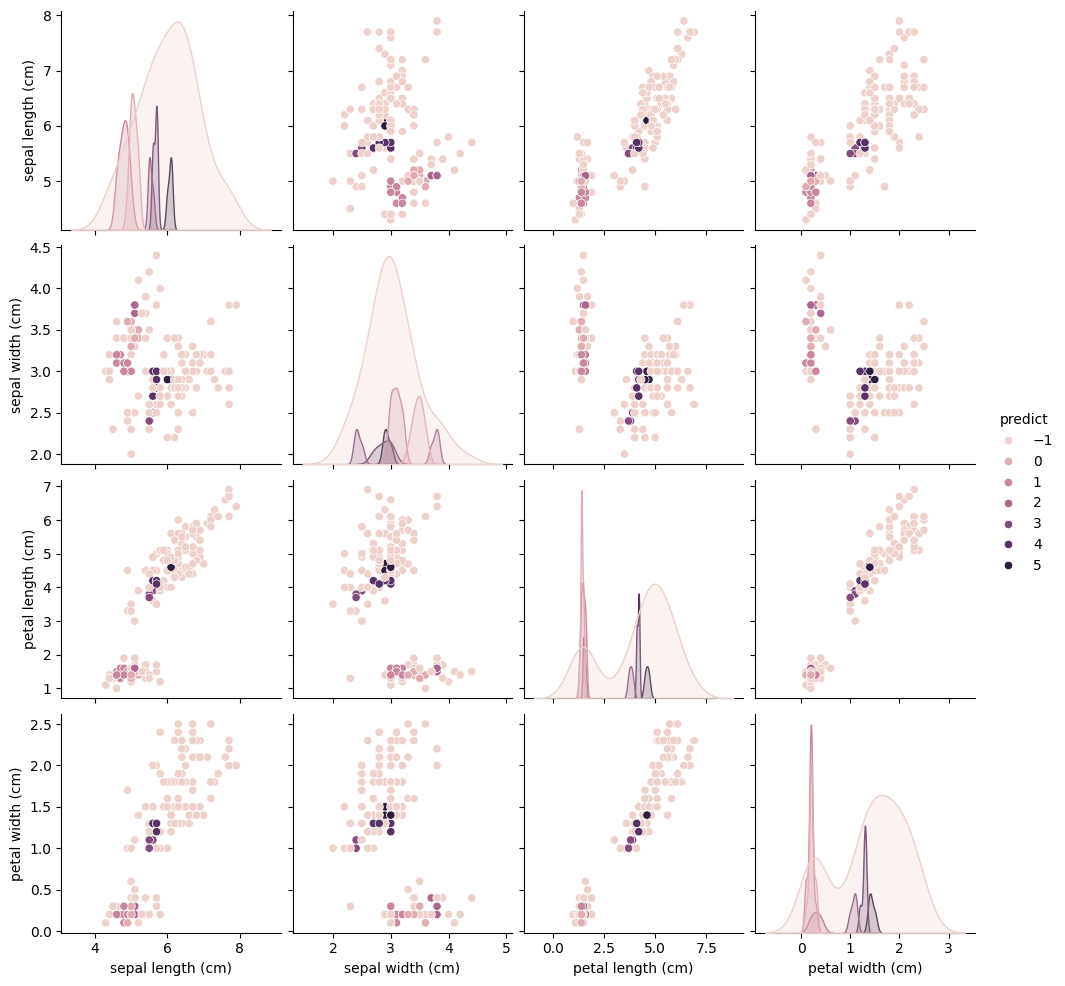

In [26]:
sns.pairplot(data=x, hue='predict')
plt.show()